# AlexNet

In [8]:
# Import the necessary libraries
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
# Download and load the cifar10 data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [13]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255.0, label

In [14]:
train_images, train_labels = normalize_img(train_images, train_labels)
test_images, test_labels = normalize_img(test_images, test_labels)

In [72]:
train_images[0:2]

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.

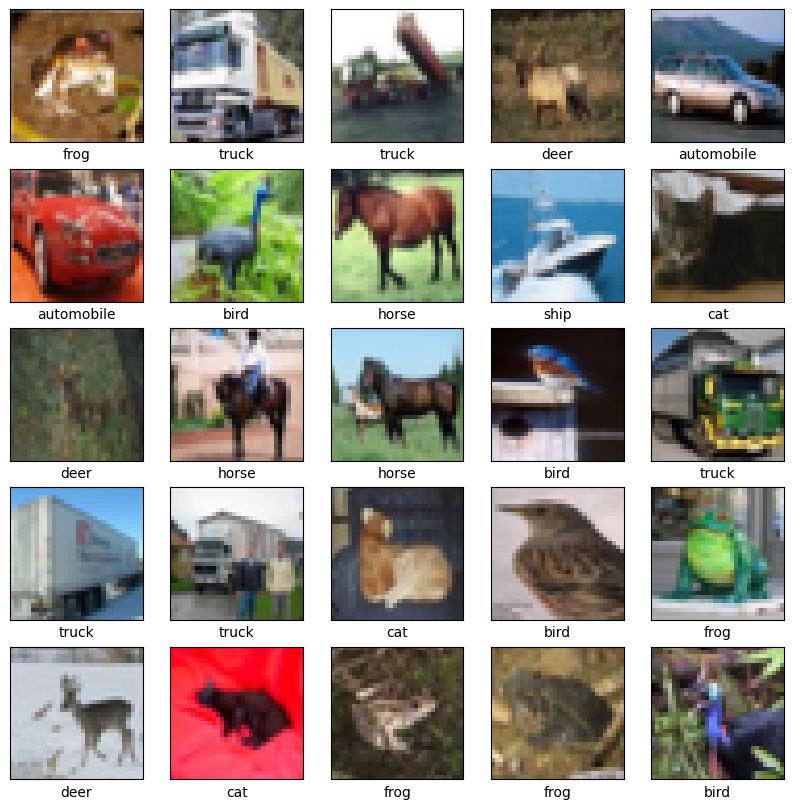

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Define a model

In [16]:
train_images.shape

TensorShape([50000, 32, 32, 3])

In [69]:
inp = tf.keras.layers.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="valid", activation='relu')(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="valid", activation="relu")(x)
# x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(10)(x)

model = tf.keras.models.Model(inp, out)

model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 4, 4, 64)          369

In [81]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [82]:
history = model.fit(
    train_images, train_labels, 
    batch_size=8, 
    epochs=20, 
    validation_data=(test_images, test_labels), 
    callbacks=tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")
    )

Epoch 1/20
6250/6250 [==============================] - 32s 5ms/step - loss: 1.4765 - accuracy: 0.4648 - val_loss: 1.1795 - val_accuracy: 0.5783
Epoch 2/20
6250/6250 [==============================] - 32s 5ms/step - loss: 1.1246 - accuracy: 0.6034 - val_loss: 1.0659 - val_accuracy: 0.6245
Epoch 3/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.9956 - accuracy: 0.6485 - val_loss: 1.0355 - val_accuracy: 0.6348
Epoch 4/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.9099 - accuracy: 0.6786 - val_loss: 0.9432 - val_accuracy: 0.6717
Epoch 5/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.8485 - accuracy: 0.7004 - val_loss: 0.9960 - val_accuracy: 0.6560
Epoch 6/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.7998 - accuracy: 0.7172 - val_loss: 0.9574 - val_accuracy: 0.6778
Epoch 7/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.7494 - accuracy: 0.7353 - val_loss: 0.9609 - val_ac

313/313 - 1s - loss: 1.0297 - accuracy: 0.6657 - 1s/epoch - 3ms/step


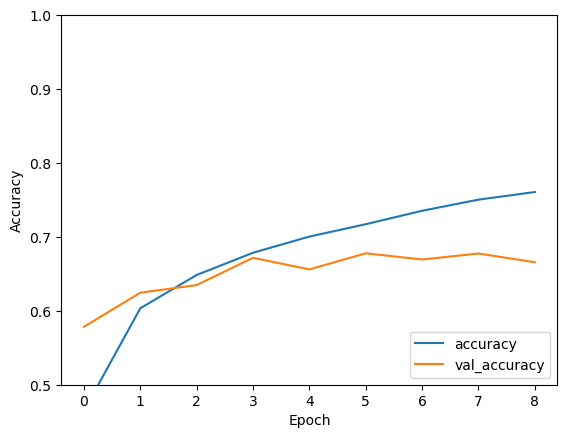

In [83]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#### Define function to test models

In [103]:
def compile_and_train(model):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
        )
    
    history = model.fit(
        train_images, train_labels, 
        batch_size=8, 
        epochs=20, 
        validation_data=(test_images, test_labels), 
        callbacks=tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")
        )
    
    
    hist = pd.DataFrame(history.history)
    
    plt.plot(hist.accuracy, label='accuracy')
    plt.plot(hist.val_accuracy, label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Testing Conv Layer filters with stride 1

In [100]:
inp = tf.keras.layers.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid", activation='relu')(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid", activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(inp, out)

model.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_73 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 4, 4, 64)          369

Epoch 1/20
6250/6250 [==============================] - 32s 5ms/step - loss: 1.4829 - accuracy: 0.4586 - val_loss: 1.2613 - val_accuracy: 0.5441
Epoch 2/20
6250/6250 [==============================] - 30s 5ms/step - loss: 1.1370 - accuracy: 0.5972 - val_loss: 1.0730 - val_accuracy: 0.6233
Epoch 3/20
6250/6250 [==============================] - 30s 5ms/step - loss: 1.0024 - accuracy: 0.6441 - val_loss: 1.0664 - val_accuracy: 0.6315
Epoch 4/20
6250/6250 [==============================] - 31s 5ms/step - loss: 0.9221 - accuracy: 0.6744 - val_loss: 0.9745 - val_accuracy: 0.6589
Epoch 5/20
6250/6250 [==============================] - 31s 5ms/step - loss: 0.8549 - accuracy: 0.6985 - val_loss: 0.9201 - val_accuracy: 0.6783
Epoch 6/20
6250/6250 [==============================] - 31s 5ms/step - loss: 0.8024 - accuracy: 0.7172 - val_loss: 0.9553 - val_accuracy: 0.6706
Epoch 7/20
6250/6250 [==============================] - 30s 5ms/step - loss: 0.7559 - accuracy: 0.7350 - val_loss: 0.9420 - val_ac

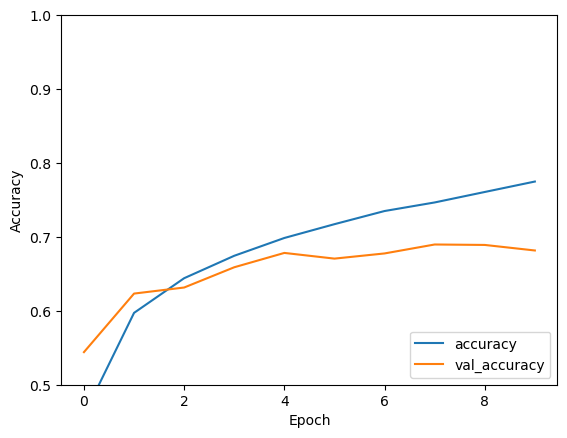

In [101]:
compile_and_train(model)

We can see that overlapping pooling

## Testing Dropout

In [105]:
inp = tf.keras.layers.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid", activation='relu')(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid", activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(inp, out)

model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_82 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_83 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                     

Epoch 1/20
6250/6250 [==============================] - 36s 6ms/step - loss: 1.5441 - accuracy: 0.4356 - val_loss: 1.2380 - val_accuracy: 0.5546
Epoch 2/20
6250/6250 [==============================] - 37s 6ms/step - loss: 1.2159 - accuracy: 0.5665 - val_loss: 1.1282 - val_accuracy: 0.6034
Epoch 3/20
6250/6250 [==============================] - 35s 6ms/step - loss: 1.0951 - accuracy: 0.6141 - val_loss: 1.0359 - val_accuracy: 0.6334
Epoch 4/20
6250/6250 [==============================] - 35s 6ms/step - loss: 1.0209 - accuracy: 0.6411 - val_loss: 1.0142 - val_accuracy: 0.6456
Epoch 5/20
6250/6250 [==============================] - 34s 5ms/step - loss: 0.9730 - accuracy: 0.6609 - val_loss: 0.9763 - val_accuracy: 0.6539
Epoch 6/20
6250/6250 [==============================] - 36s 6ms/step - loss: 0.9388 - accuracy: 0.6698 - val_loss: 0.9780 - val_accuracy: 0.6611
Epoch 7/20
6250/6250 [==============================] - 34s 5ms/step - loss: 0.9074 - accuracy: 0.6832 - val_loss: 0.8968 - val_ac

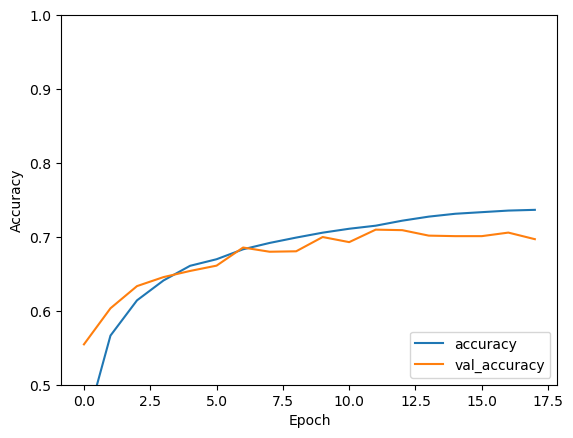

In [106]:
compile_and_train(model)

## Testing Overlapping Pooling

In [109]:
inp = tf.keras.layers.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid", activation='relu')(inp)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid", activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(inp, out)

model.summary()

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_88 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_89 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                     

Epoch 1/20
6250/6250 [==============================] - 33s 5ms/step - loss: 1.5748 - accuracy: 0.4240 - val_loss: 1.3344 - val_accuracy: 0.5224
Epoch 2/20
6250/6250 [==============================] - 33s 5ms/step - loss: 1.2915 - accuracy: 0.5386 - val_loss: 1.2451 - val_accuracy: 0.5637
Epoch 3/20
6250/6250 [==============================] - 33s 5ms/step - loss: 1.1850 - accuracy: 0.5785 - val_loss: 1.1290 - val_accuracy: 0.6063
Epoch 4/20
6250/6250 [==============================] - 33s 5ms/step - loss: 1.1166 - accuracy: 0.6065 - val_loss: 1.0445 - val_accuracy: 0.6345
Epoch 5/20
6250/6250 [==============================] - 31s 5ms/step - loss: 1.0709 - accuracy: 0.6236 - val_loss: 1.0428 - val_accuracy: 0.6236
Epoch 6/20
6250/6250 [==============================] - 30s 5ms/step - loss: 1.0368 - accuracy: 0.6373 - val_loss: 1.0024 - val_accuracy: 0.6552
Epoch 7/20
6250/6250 [==============================] - 32s 5ms/step - loss: 1.0001 - accuracy: 0.6477 - val_loss: 0.9721 - val_ac

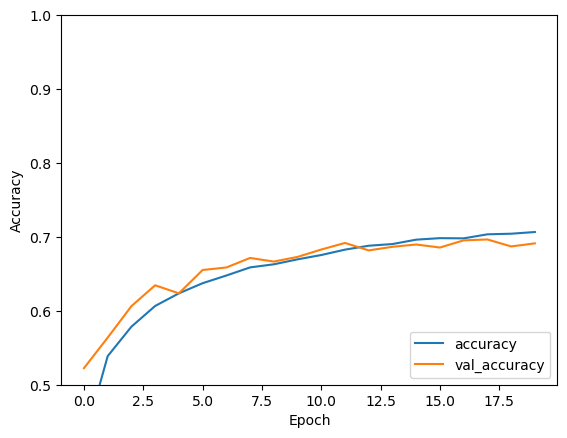

In [110]:
compile_and_train(model)

## Testing Augmented data 

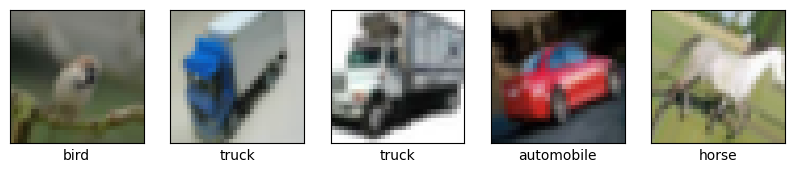

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    fill_mode='nearest'  
)

datagen.fit(train_images)

augmented_images = datagen.flow(train_images, train_labels, batch_size=5)

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    augmented_image, augmented_label = augmented_images.next()
    plt.imshow(augmented_image[0])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[augmented_label[0][0]])
plt.grid(False)
plt.show()

In [196]:
# Define the model
inp = tf.keras.layers.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid", activation='relu')(inp)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid", activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(inp, out)

## Define function to train augmented data

In [197]:
def compile_and_train_aug(model):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
        )
    
    history = model.fit(
        datagen.flow(train_images, train_labels, batch_size=32), 
        batch_size=8, 
        epochs=20, 
        validation_data=(test_images, test_labels), 
        callbacks=tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")
        )
    
    
    hist = pd.DataFrame(history.history)
    
    plt.plot(hist.accuracy, label='accuracy')
    plt.plot(hist.val_accuracy, label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/20


2025-02-12 01:12:57.765809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1563/1563 [==============================] - 18s 11ms/step - loss: 1.7170 - accuracy: 0.1299 - val_loss: 1.3961 - val_accuracy: 0.0725
Epoch 2/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4415 - accuracy: 0.1002 - val_loss: 1.2889 - val_accuracy: 0.0850
Epoch 3/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3463 - accuracy: 0.0981 - val_loss: 1.3094 - val_accuracy: 0.0914
Epoch 4/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2950 - accuracy: 0.0981 - val_loss: 1.1388 - val_accuracy: 0.0959
Epoch 5/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2524 - accuracy: 0.0968 - val_loss: 1.0904 - val_accuracy: 0.1067
Epoch 6/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2166 - accuracy: 0.0988 - val_loss: 1.0765 - val_accuracy: 0.0807
Epoch 7/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1965 - accuracy: 0.0984 - val_loss: 1.0172 - val_accura

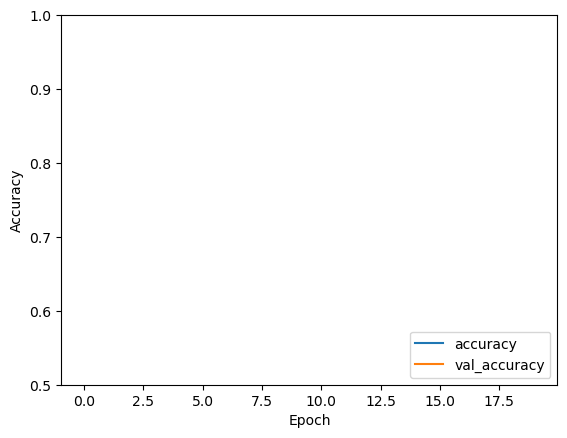

In [198]:
compile_and_train_aug(model)

## Testing `padding="same"`

In [ ]:
# Define the model
inp = tf.keras.layers.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="same", activation='relu')(inp)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="same", activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(inp, out)

In [ ]:
compile_and_train(model)

Epoch 1/20
6250/6250 [==============================] - 34s 5ms/step - loss: 0.9757 - accuracy: 0.6608 - val_loss: 0.8995 - val_accuracy: 0.6842
Epoch 2/20
6250/6250 [==============================] - 31s 5ms/step - loss: 0.9546 - accuracy: 0.6662 - val_loss: 0.9307 - val_accuracy: 0.6800
Epoch 3/20
6250/6250 [==============================] - 31s 5ms/step - loss: 0.9319 - accuracy: 0.6741 - val_loss: 0.9262 - val_accuracy: 0.6806
Epoch 4/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.9104 - accuracy: 0.6817 - val_loss: 0.9440 - val_accuracy: 0.6752
Epoch 5/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.9036 - accuracy: 0.6838 - val_loss: 0.8911 - val_accuracy: 0.6990
Epoch 6/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.8829 - accuracy: 0.6929 - val_loss: 0.9316 - val_accuracy: 0.6785
Epoch 7/20
6250/6250 [==============================] - 32s 5ms/step - loss: 0.8849 - accuracy: 0.6944 - val_loss: 0.8768 - val_ac